In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Математика для Data Science

Сегодня мы начнем проходить основные разделы математики, которые нам дальше понадобятся для того, чтобы понять как работают модели машинного обучения

Разделы математики, которые мы будем изучать:

- Линейная алгебра (изучали во втором ноутбуке)
- Математический анализ
- Методы оптимизации
- Теория вероятностей
- Математическая статистика (в следующем ноутбуке)

Чтобы изучение было интересным, будем писать код для решения задач, вместо решения задач на листочке

## Мат. анализ

Из всей теории мат. анализа нам понадобятся только самые основы, а именно - функции и их основные свойства.

Функция $f(x)$ сопоставляет всем элементам множества $X$ элементы множества $Y$.

Например, функция $f(x) = 5x + 1$ превращает любое вещественное число в другое вещественное число.

### Свойства функций

Будем называть функцию непрерывной, если можно построить ее график, не отрывая карандаша от бумаги. [Более строгое определение](https://ru.wikipedia.org/wiki/%D0%9D%D0%B5%D0%BF%D1%80%D0%B5%D1%80%D1%8B%D0%B2%D0%BD%D0%B0%D1%8F_%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D1%8F#%D0%9E%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5)

У функции могут быть разрывы, тогда мы говорим, что функция имеет разрыв в какой-то точке

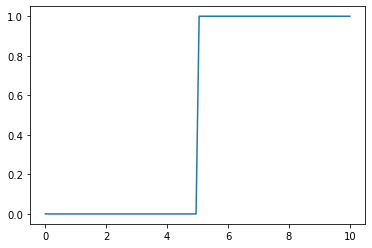

In [3]:
def gap_func(x):
    y = x.copy()
    y[y <= 5] = 0
    y[y > 5] = 1
    return y
    
x = np.linspace(0, 10, 100)
y = gap_func(x)
plt.plot(x, y)

Будем называть функцию дифференцируемой, если можно провести единственную касательную в каждой точке функции

Функция может быть дифференцируемой только если она непрерывна

Пример недифференцируемой функции $y=|x|$, такая функция не будет иметь производной в точке 0, так как мы можем провести бесконечное количество касательных в этой точке

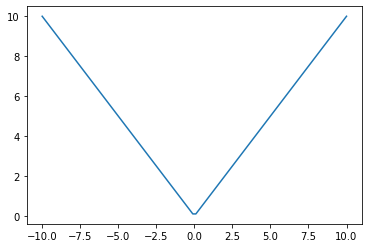

In [4]:
x = np.linspace(-10, 10, 100)
y = np.abs(x)

plt.plot(x, y)

Пример касательной

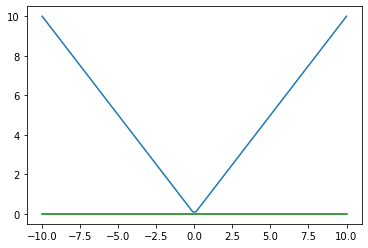

In [5]:
plt.plot(x, y)
plt.plot(x, x * 0, color='g')

Еще один пример касательной

Таких примеров можно привести очень много

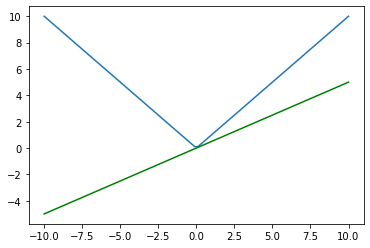

In [6]:
plt.plot(x, y)
plt.plot(x, x * 0.5, color='g')

Пример дифференцируемой функции (еще их называют гладкими функциями)

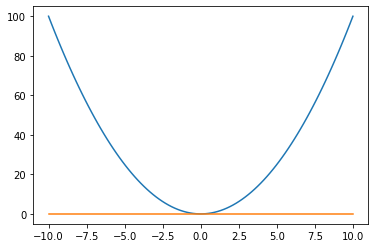

In [7]:
y = x ** 2
plt.plot(x, y)
plt.plot(x, 0 * x)

Дифференцируемые функции интересны тем, что в них легко искать максимумы и минимумы. Для этого используют понятие производной.

Касательную можно записать в виде уравнения $y = kx + b$

Значение $k$ как раз и будет значением производной функции в этой точке.

Если производная больше нуля, то функция растет

Если производная меньше нуля, то функция убывает

Если производная равна нулю, то функция либо максимальна, либо минимальная, либо имеет точку перегиба

**Теорема Ролля**

Если функция определена и дифференцируема на промежутке $[a, b]$ и $f(a) = f(b)$, то существует точка $c$, такая что $f'(c)=0$

[Доказательство](https://ru.wikipedia.org/wiki/%D0%A2%D0%B5%D0%BE%D1%80%D0%B5%D0%BC%D0%B0_%D0%A0%D0%BE%D0%BB%D0%BB%D1%8F) использует некоторые другие теоремы, которые мы не рассматриваем в курсе.

Чтобы понять суть теоремы, можно еще раз обратиться к графику. Как угодно меняя функцию на этом промежутке (не меняя значения на концах), пока она будет оставаться гладкой, все равно будет образовываться хотя бы одна "ямка" или "горка"

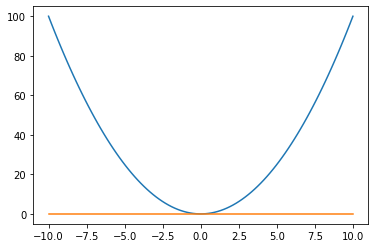

In [8]:
y = x ** 2
plt.plot(x, y)
plt.plot(x, 0 * x)

Для функция многих переменных работают все те же правила, ниже рассмотрим примеры

## Оптимизация

Для любой функции можно найти минимум, если приравнять к нулю ее производную и найти все точки, в которых она будет равна нулю

$f'(x)=0$

Каждый метод оптимизации ровно это и делает, но немного разными способами. 

### Зачем искать минимумы и максимумы функций? 

Давайте возьмем какую-нибудь модель машинного обучения $M(w, x)$, которая должна определять, изображен на картинке кот или собака. У нее есть параметр $w$ и входные данные $x$ (изображение).

Возьмем какой-то параметр $w_1$, подставим в модель и получим функцию одной переменной $M(w_1, x)=M_1(x)$

Теперь наша модель может взять какой-то пример (например, картинку $x$) и сказать что на ней изображено (кот или собака). А то, насколько качественно она будет это делать, зависит от параметра $w$.

Чтобы подобрать оптимальные параметры для какой-то обучающей выборки мы и используем методы оптимизации.

Для этого обычно вводят функцию ошибки $E(w)$, которая говорит насколько сильно наша модель ошибается на каких-то тренировочных данных для введенных параметров и чтобы подобрать оптимальные параметры мы минимизируем эту фукнцию

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.optimize import minimize

Минимизируем функцию $f(x)=x^2-3x+2$

In [10]:
def f(x):
    return x ** 2 - 3 * x + 2

Производная функции: $f'(x)=2x-3$

$f'(x)=0 $

$x_{min} = \frac{3}{2}$

Проверим численно:

In [11]:
x_start = 10
minimize(f, (x_start,))

      fun: -0.25
 hess_inv: array([[0.49999999]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 10
      nit: 4
     njev: 5
   status: 0
  success: True
        x: array([1.49999999])

Нарисуем график:

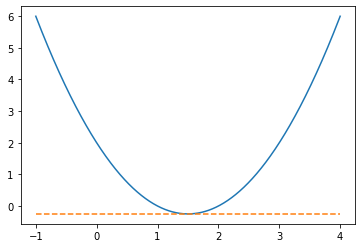

In [12]:
x = np.linspace(-1, 4, 1000)
y = f(x)
minimum = np.ones_like(x) * -0.25

plt.plot(x, y)
plt.plot(x, minimum, '--')

## Задача

Максимизировать функцию $g(x)=-x^5 - 10x^4 + 5x^3 + 10$

P.S. функции `maximize` нет в `scipy`

In [13]:
# Ваш код здесь


## Задача

Построить график производной функции из прошлой задачи

Производную можно вычислить аналитически и задать как функцию в python

In [14]:
# Ваш код здесь



Если для функций одной переменной понятно как это работает, то для функции многих переменных используют другие, более продвинутые методы. Например, метод градиентного спуска, который мы опишем чуть ниже.

[Презентация с красивыми графиками](https://iloveeconomics.ru/sites/default/files/n_d_optimization.pdf)

Оптимизируем функцию многих переменных

In [15]:
def f(x, y):
    return x ** 2 + y ** 2

In [16]:
x_start = [10, 10]
minimize(lambda x: f(x[0], x[1]), (x_start,))

      fun: 9.714371410949269e-13
 hess_inv: array([[ 0.75000002, -0.24999998],
       [-0.24999998,  0.75000002]])
      jac: array([-1.37896909e-06, -1.37896909e-06])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 2
     njev: 4
   status: 0
  success: True
        x: array([-6.96935126e-07, -6.96935126e-07])

## Алгоритм градиентного спуска: идея

С этого момента и везде далее мы будем считать, что все рассматриваемые функции дифференцируемы на всей области определения.

Посмотрим на график этой коварной функции и на случайную точку $(x, y)$ на нем:

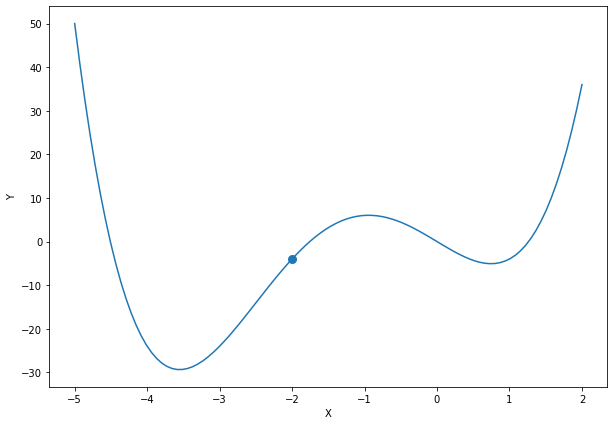

In [17]:
def F(x):
    return x**4 + 5*x**3 - 10*x

x = np.linspace(-5, 2, 100)
y = list(map(F, x))

plt.figure(figsize=(10,7))
plt.plot(x, y)
plt.ylabel("Y")
plt.xlabel("X")
plt.scatter([-2], [F(-2)], lw=3)
plt.show()

Давайте представим, что мы не видим графика этой функции, но очень хотим найти точку минимума функции.

Из ноутбука по производным мы помним, что знак производной функции в точке показывает, возрастает функция в этой точке или убывает (ну или имеет экстремум). Как нетрудно догадаться, производная в точке $(x, y)$ на нашем графике будет $< 0$, функция в этой точке возрастает. <br>
Это значит, что **какая-то точка локального минимума функции находится левее точки $x$**. <br>
("правее" значит, что минимум функции достигается при значении аргумента $< x$). <br>
Это отличное наблюдение! Это значит, что если мы уменьшим $x$ на некоторую величину $\Delta x$, то мы можем стать ближе к точке минимума!

Тогда алгоритм поиска точки минимума выглядит так:

1. Берем случайную точку $x$ функции $F$
2. Вычисляем производную $F'(x)$
3. Если $F'(x) > 0$, уменьшаем $x$, если $F'(x) < 0$, увеличиваем $x$
4. Повторяем 2-3 

То есть, мы берем случайную точку и начинаем движение от нее к точке минимума, каждый шаг алгоритма вычисляя производную функции в точке, в которой сейчас находимся и сдвигая эту точку в направлении минимума.<br>
Вычислять производную на каждом шаге нужно, потому что мы в какой-то момент можем "перепрыгнуть" через точку минимума, тогда производная поменяет знак и мы поймем, что нужно двигаться обратно.

В идеале это "движение" должно выглядеть так:

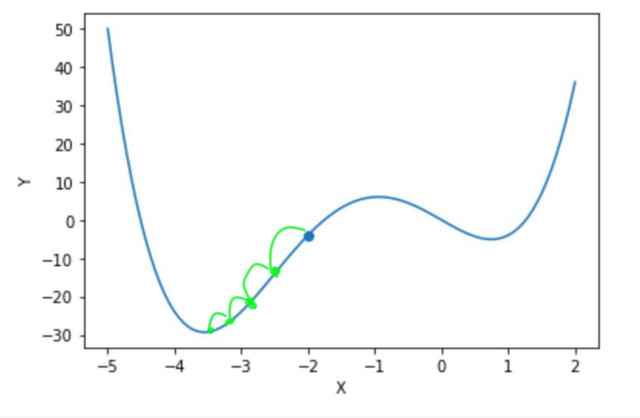



Остается два вопроса: на какую величину $\Delta x$ уменьшать и когда останавливать алгоритм.

Давайте попробуем выбрать $\Delta x$. Это нетривиально, ведь мы не видим графика функции и не знаем, насколько далеко точка минимума. А численное значение производной нам показывает только факт убывания функции и скорость убывания (уго наклона графика), но не расстояние до точки минимума.

Другими словами, минимум может быть в точке $x-0.2$, а может быть в точке $x - 200$. 

Если мы возьмем слишком большую величину, то можем просто перескочить через точку минимума. Примером такой величины может быть $\Delta x = 2.5$:

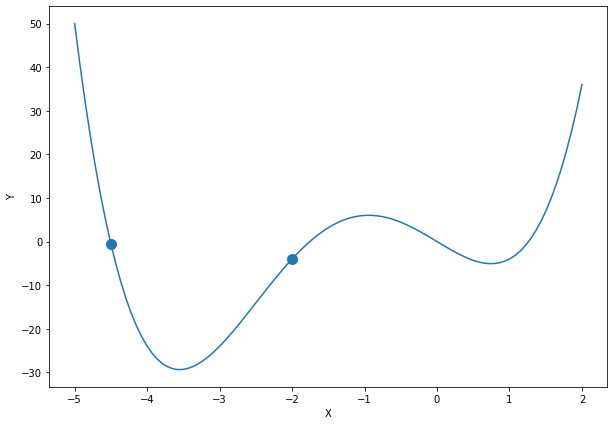

In [18]:
def F(x):
    return x**4 + 5*x**3 - 10*x

x = np.linspace(-5, 2, 100)
y = list(map(F, x))

plt.figure(figsize=(10,7))
plt.plot(x, y)
plt.ylabel("Y")
plt.xlabel("X")
plt.scatter([-2, -4.5], [F(-2), F(-4.5)], lw=5)
plt.show()

Итак, нужно брать $\Delta x$ довольно маленьким. 

Если мы зафиксируем некоторую величину $\Delta x$ и на каждом шаге алгоритма будем сдвигать $x$ на одинаковую величину $\Delta x$ в направлении минимума, то это может занять очень много времени (например, когда точка минимума в точке $x = 1$, а мы стоим в точке $x = 1001$ и $\Delta x = 1$, нам потребуется 1000 шагов алгоритма, чтобы дойти до минимума). Плюс, если мы стоим в точке $x = 1.5$, то, сдвинувшись на $\Delta x = 1$ по направлению к точке минимума мы попадем в точку $x = 0.5$, далее опять сдвинувшись на $\Delta x = 1$ по направлению к точке минимума мы попадем в точку $x = 1.5$ и будем так ходить туда-сюда, не приближаясь к точке минимума $x = 1$ ближе. 

Давайте еще раз внимательно посмотрим на график функции (выше) и увидим, что чем ближе точка к минимуму, тем плавнее график. <br>
Более формально, что чем ближе точка к минимуму, тем меньше скорость убывания/возрастания функции, а значит, тем меньше модуль значения производной.

Мы можем это использовать. Давайте зафиксируем некоторое маленькое число $\varepsilon$ и каждый шаг алгоритма будем двигать $x$ по направлению к минимуму на шаг $\varepsilon \cdot |F'(x)|$. Тогда пока наша точка будет далеко от минимума, $|F'(x)|$ будет довольно большим и мы будем двигаться большими шагами, а по мере приближения к точке минимума $|F'(x)|$ будет уменьшаться, и наш шаг тоже будет уменьшаться. Так мы менее вероятно перескочим через точку минимума и подойдем к ней ближе в итоге.

Ответ на второй вопрос -- когда останавливать алгоритм поиска минимума -- может быть разный. Действуя таким образом, ровно в точку минимума мы почти никогда не попадем, придется остановиться в какой-то точке возле минимума. Но для применений этого алгоритма нахождение точки около минимума вполне хватает. Чаще всего алгоритм останавливается после прохождения определенного количества шагов и/или достижения определенной близости к точке минимума. Близость, опять же, можно измерять значением производной в точке. Чем ближе, тем модуль производной меньше.

Итак, теперь мы можем сформулировать итоговый алгоритм:

## Алгоритм градиентного спуска 



1. Берем некоторую точку $x$ функции $F$, фиксируем $\varepsilon$ (например, $\varepsilon = 0.001$)
2. Вычисляем производную $F'(x)$
3. Изменяем $x$ : $x = x - \varepsilon F'(x)$ 
4. Повторяем 3, пока не пройдет определенное количество шагов и/или мы не станем достаточно близко к точке минимума.

Этот алгоритм называется **алгоритм градиентного спуска**. "Градиентного" -- потому что мы "спускаемся" к точке минимума, вычисляя производную (градиент) функции на каждом шаге.

Выглядит это как-то так:

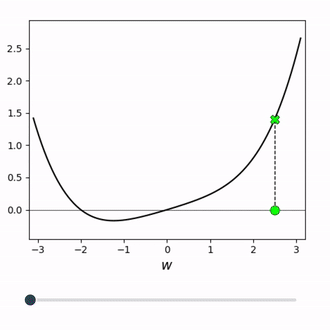

Заметим, что, начиная движение из одной точки, мы можем найти только одну точку локального минимума. Если хочется найти несколько точек, можно запустить алгоритм градиентного спуска несколько раз из разных случайно выбранных точек. Но гарантии, что мы найдем все точки минимума или что найдем точку глобального минимума, нет.

Существует множество молификаций/оптимизаций алгоритма градиентного спуска, но о них мы говорить не будем. Центральная идея у них одна и та же -- спуск к точке минимума, используя градиент функции.

## Оптимизация функций многих переменных

Давайте перейдем к функциям многих переменных. 

Идея нахождения минимума функции многих переменных такая же, как и для функции одной переменной. 

Давайте рассмотрим функцию $F(x_1, x_2, \dots, x_n)$ $n$ переменных. <br>
Алгоритм выглядит так:

1. Берем некоторую точку $x = (x_1, x_2, \dots, x_n)$ функции $F$, фиксируем $\varepsilon$ (например, $\varepsilon = 0.001$)
2. Вычисляем частные производные $F'(x)$ по всем $n$ аргументам функции в точке $x = (x_1, x_2, \dots, x_n)$, получаем градиент <br>
$\triangledown F = (F'_{x_1}(x_1, x_2, \dots, x_n), F'_{x_2}(x_1, x_2, \dots, x_n), \dots, F'_{x_n}(x_1, x_2, \dots, x_n)) = \left(\frac{\partial F}{\partial x_1}(x_1, x_2, \dots, x_n),\frac{\partial F}{\partial x_2}(x_1, x_2, \dots, x_n), \dots, \frac{\partial F}{\partial x_n}(x_1, x_2, \dots, x_n)\right)$
3. Изменяем  <br>
$x_1 : x_1 = x_1 - \varepsilon F'_{x_1}(x_1, x_2, \dots, x_n)$ <br>
$x_2 : x_2 = x_2 - \varepsilon F'_{x_2}(x_1, x_2, \dots, x_n)$ <br>
$\dots$ <br>
$x_n : x_n = x_n - \varepsilon F'_{x_n}(x_1, x_2, \dots, x_n)$ <br>
или, в векторной записи, <br>
$x = x - \varepsilon \triangledown F(x)$
4. Повторяем 3, пока не пройдет определенное количество шагов и/или мы не станем достаточно близко к точке минимума по каждой из координат

То есть мы вычисляем частные производные по каждому аргументу функции, понимаем для каждого аргумента функции, возрастает или убывает функция по этому аргументу и меняем значения всех $n$ аргументов в ту сторону, где функция убывает.

В случае функции двух переменных алгоритм может выглядеть так:

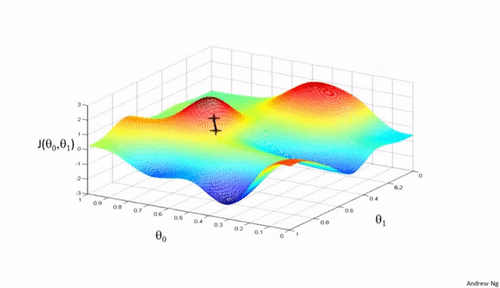

**Задача:**  Вычислите шаг градиентного спуска фукнции $F(x_1,x_2,x_3,x_4)=x_1\cdot x_2 + x_3^5 + e^{x_4}$ для некоторого фиксированного $\varepsilon$ и начального приближения $x_0=(x_1^0,x_2^0, x_3^0,x_4^0)$. Выпишите формулу градиентного спуска в этом случае.

# Теория вероятности

Подбросим монетку разное количество раз

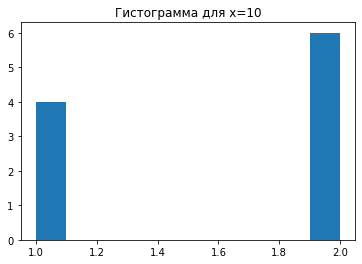

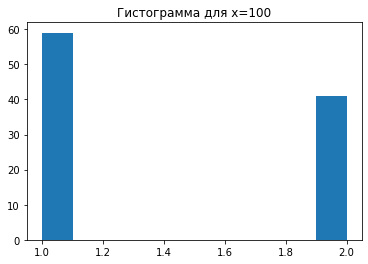

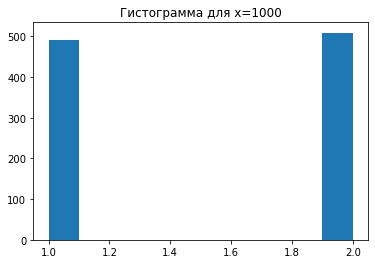

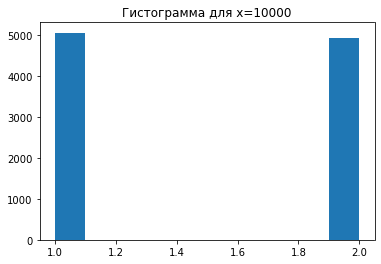

In [35]:
for x_len in [10, 100, 1000, 10000]:
    x = np.random.randint(1, 3, size=(x_len,))
    plt.figure()
    plt.title(f'Гистограмма для x={x_len}')
    plt.hist(x)

Некоторые вещи в жизни точны, большинство - менее предсказуемы.

Случайность повсюду вокруг нас.

## Случайные явления

Чтобы получить что-то полезное от феномена случайности, можно например:
* Изучить диапазон\ среднее значение\ изменчивость
* Повлиять на отношения между данными\ структуру данных\ изменения от времени
* Предсказать	будущий исход\ правдоподобие исхода\ гарантированность исхода
* Получить выгоду	при планировании\ создании нового объекта или события с нужным исходом

## Эксперименты

Теория вероятности была разработана в части поддержки различных научных начинаний.

*Эксперимент* - **процесс** генерации случайных данных и наблюдения исходов.

**Подход един** и в целом применим независимо от конкретики задачи.

## Исходы и пространство элементарных исходов

Потенциальный результаты эксперимента называются *(возможные) исходы*.
Множество возможных исходов - *пространство элементарных исходов*,  обозначается $\mathbb{U}$ ($\Omega \space \mathbb{S}$)
$$
\begin{array}{l|l}
    Эксперимент & \mathbb{U} \\ \hline
    Монетка & \{h, t\} \\
    Кубик & \{1,2,...,6\} \\
    Пол & \{m, f\} \\
    Возраст & N \\
    Температура & R
\end{array}
$$



## Два типа пространств элементарных исходов

Конечное или счетное пространство элементарных исходов - *дискретное*.
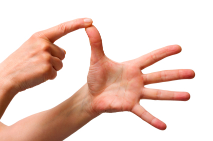
$$
\{h,t\}
\qquad
\{1,2,\ldots,6\}
\qquad
N
\qquad
Z
\qquad
\{слова\}
\qquad
\{сайты\}
\qquad
\{люди\}
$$




Несчетное бесконечное пространство элементарных исходов -*непрерывное*.
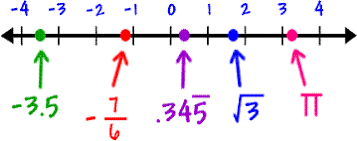
$$
R
\qquad
[0,1]
\qquad
\{температура\}
\qquad
\{зарплаты\}
\qquad
\{цены\}
$$

### Какие величины непрерывные, а какие дискретные?

- Вероятность выжить на Титанике
- Изменение цены показателя на бирже
- Пол новорожденного ребенка
- Время, в которое на футбольном матче произойдет первый гол

## Случайные исходы и случайные величины
***Случайный исход или событие*** — подмножество пространства элементарных исходов случайного эксперимента.

***Случайная величина*** - это функция из множества элементарных исходов в множество вещественных не отрицательных чисел или численное выражение результата случайного события. Обозначают $X$ (при необходимости можно использовать $Y$, $Z$ и т.д.)

Пример эксперимента:
**подбрасываем монету**

До подбрасывания: $X \in \mathbb{U}:\{\text{Орел, Решка}\}$

После подбрасывания: 
$$
\begin{matrix}
   \text{получили орел} & X=\text{орел} \\
   \text{получили решка} & X=\text{решка}
\end{matrix}
$$
Увиденный исход называется *наблюдение*.



## Вероятность исхода

**Вероятность (probability)** исхода $x\in\mathbb{U}$, обозначают $P(x)$ или $P(X=x)$. 

**Вероятность (классическо определение)** - это доля раз, когда $x$ произойдет, если эксперимент повторяется много раз.
Вероятностью случайного события A называется отношение числа n несовместимых равновероятных элементарных событий, составляющих событие A, к числу всех возможных элементарных событий N:

$P(A)={\frac {n}{N}}$


### Обобщение

$n$ - число экспериментов
$x \in \mathbb{U}\qquad n_x$ - число появлений $x$
$$
P(x) = \lim\limits_{n\to\inf}\frac{n_x}{n}
$$



## свойства вероятностей

1) вероятность невозможного события (пустого множества $\varnothing $ равна нулю:

$$\mathbf {P} \{\varnothing \}=0;$$


2) если событие A включается («входит») в событие B, то есть $ A\subset B$, то есть наступление события A влечёт также наступление события B, то:

$$\mathbf {P} \{A\}\leqslant \mathbf {P} \{B\};$$


3) вероятность каждого события {\displaystyle A}A находится от 0 до 1, то есть удовлетворяет неравенствам:

$$0\leqslant \mathbf {P} \{A\}\leqslant 1;$$

4) вероятность наступления события $B\setminus A$, где $A\subset B$, заключающегося в наступлении события $B$ при одновременном ненаступлении события $A$, равна:

$$\mathbf {P} \{B\setminus A\}=\mathbf {P} \{B\}-\mathbf {P} \{A\};$$

5) вероятность события ${\bar {A}}$, противоположного событию $A$, равна:

$$\mathbf {P} \{{\bar {A}}\}=1-\mathbf {P} \{A\};$$

6) (теорема сложения вероятностей) вероятность наступления хотя бы одного из (то есть суммы) произвольных (не обязательно несовместных) двух событий $A$ и $B$ равна:

$$\mathbf {P} \{A+B\}=\mathbf {P} \{A\}+\mathbf {P} \{B\}-\mathbf {P} \{AB\}.$$

## Задача:

Абонент забыл последнюю цифру номера телефона и поэтому набирает её наугад. Определить вероятность того, что ему придётся звонить не более чем в 3 места.

## Функция распределения

Это функция $F(x)$, которая характеризует вероятность того, что случайная величина примет значение, меньшее $х$

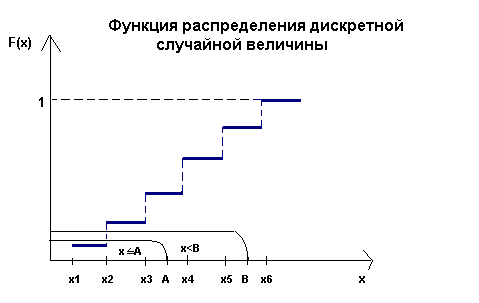

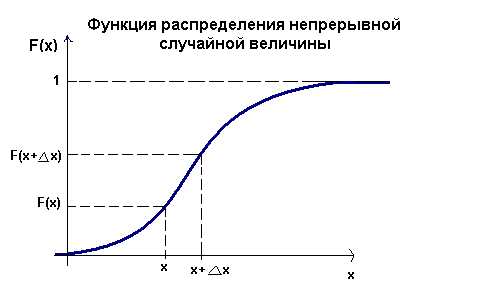

## Функция плотности распределения

Это функция $f(x)=F'(x)$

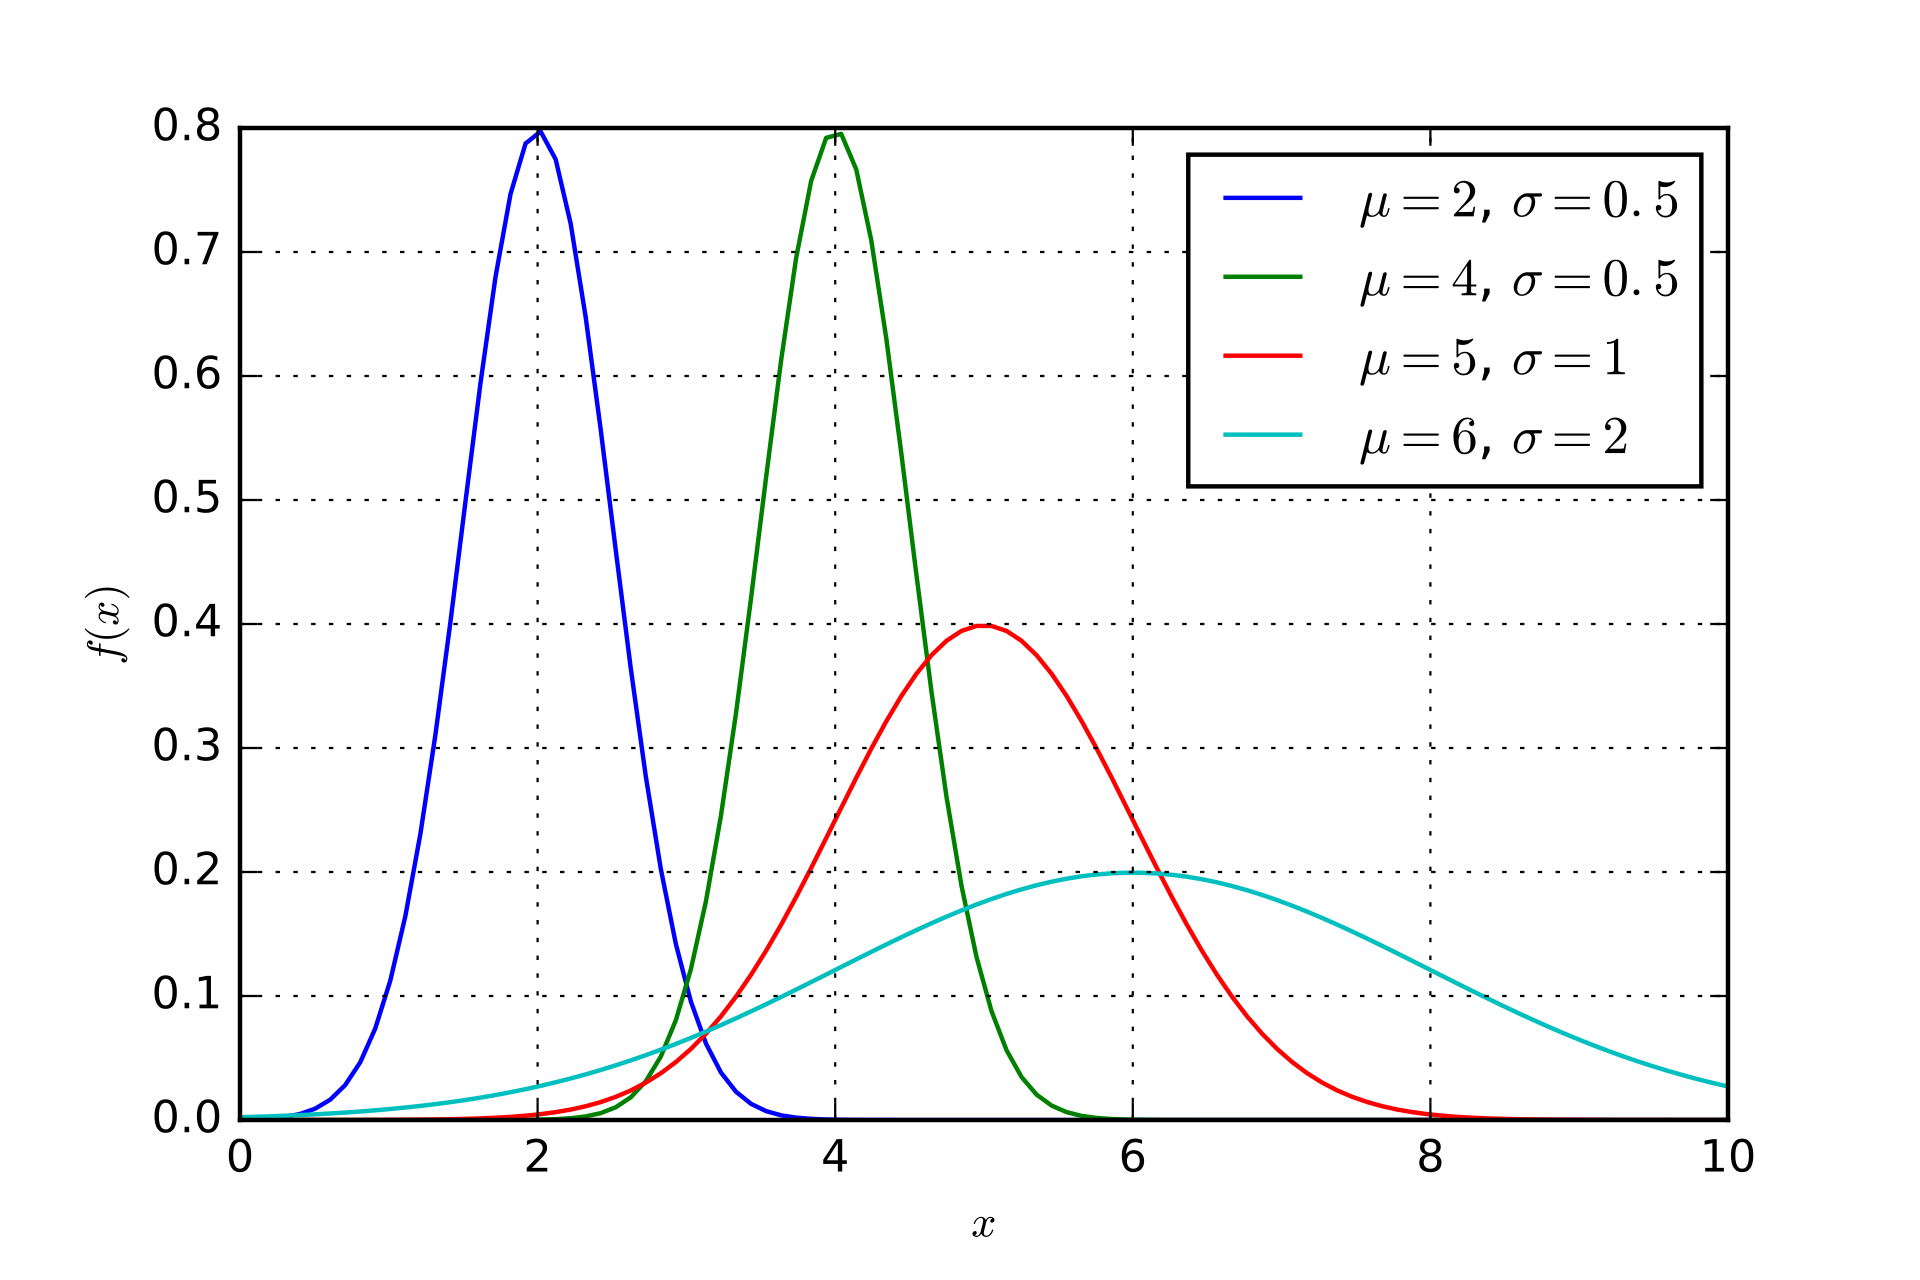

Вероятность того, что событие произойдет в промежутке $(a, b)$ равно интегралу функции плотности от $a$ до $b$

<AxesSubplot:ylabel='Density'>

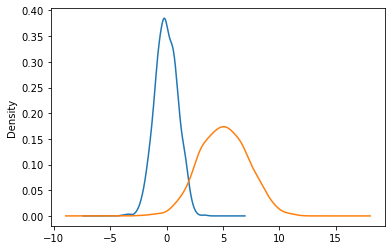

In [20]:
x = np.random.normal(loc=0, scale=1, size=(1000,))
y = np.random.normal(loc=5, scale=2, size=(1000,))
x_df = pd.DataFrame(x)
y_df = pd.DataFrame(y)
x_df[0].plot(kind='density')
y_df[0].plot(kind='density')

Смешаем распределения

<AxesSubplot:ylabel='Density'>

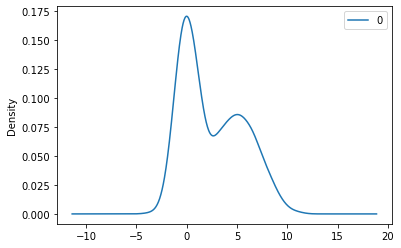

In [21]:
x_df.append(y_df).plot(kind='density')

## Нормальное распределение

Задается функцией плотности распределения

## $$f(x) = \frac{1}{\sigma \sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}$$

Среднее, мода и медиана совпадают и равны $\mu$

Среднеквадратичное отклонение равно $\sigma$

Дисперсия равна $\sigma^2$

Функция распределения называется **функцией Лапласа** (интеграл от функции выше).

Вообще, интеграл от этой функции не берется, поэтому значения функции Лапласа можно найти в специальных таблицах.

### Примеры нормального распределения

- отклонение при стрельбе
- погрешности измерений
- рост людей

### Приведение нормального распределения к стандартному

x - из нестандартного нормального распределения со средним $\mu$ и среднеквадратичным отклонением $\sigma$

z - соответствующий элемент из стандартного нормального распределения

## $z = \frac{x - \mu}{\sigma}$

## Пример

Из пункта $C$ ведётся стрельба из орудия вдоль прямой $CK$.

Предполагается, что дальность полёта распределена нормально с математическим ожиданием 1000 м и средним квадратическим отклонением 5 м.

Определить (в процентах) сколько снарядов упадёт с перелётом от 5 до 70м.

In [22]:
import scipy.stats

# Функция Лапласа для стандартного нормального распределения
def normal_integral(x):
    return scipy.stats.norm.cdf(x) - 0.5

Вероятность того, что событие $x$ произойдет в промежутке $[a, b]$ ($x$ из стандартного нормального распределения)

$P(x \in [a, b]) = \Phi(b) - \Phi(a) $

In [23]:
a = (1005 - 1000) / 5
b = (1070 - 1000) / 5
answer = normal_integral(b) - normal_integral(a)

round(answer * 100, 2)

15.87

### Правило трех сигм

При нормальном распределении с вероятностью 99% все события лежат в интервале $[\mu - 3\sigma, \mu + 3\sigma]$

![](../images/3-sigma.svg)

## Задача 

Диаметр подшипников, изготовленных на заводе, представляет собой случайную величину, распределенную нормально с математическим ожиданием 1,5 см и средним квадратическим отклонением 0,04 см.

Найти вероятность того, что размер наугад взятого подшипника колеблется от 1,4 до 1,6 см.

Оценить порядок величины можно при помощи правила трех сигм (точный ответ можно получить как в задаче выше)

In [24]:
# Ваш код здесь


## Условная вероятность

$P(B|A)$ - вероятность того, что произойдет событие $B$, если произошло событие $A$

Отсюда следует формула вероятности совместного наступления событий $A$ и $B$:

$P(AB)=P(A)P(B|A)=P(B)P(B|A)$


### Формула полной вероятности

Пусть событие $A$ осуществляется лишь при совершении одного из событий $B_1, B_2, ..., B_n$, причем сумма вероятностей $B_i$ равна 1

Тогда вероятность события A будет равна

### $P(A) = P(B_1)P(A|B_1) + P(B_2)P(A|B_2) + ... + P(B_n)P(A|B_n)$

## Задача

Имеются три одинаковые урны.

В первой урне находятся 4 белых и 7 черных шаров, во второй – только белые и в третьей – только черные шары.

Наудачу выбирается одна урна и из неё наугад извлекается шар. 

Какова вероятность того, что этот шар чёрный?

### Теорема Байеса

Допустим, мы предполагаем, что событие $A$ произойдет с вероятность $P(A)$, а $B$ с вероятностью $P(B)$ и эти события связаны. 

Если совершается событие $B$, то мы можем пересчитать вероятность события $A$

## $P(A|B) = \frac{P(B|A)  P(A)}{P(B)}$

Причем $P(B)$ обычно считаем по формуле полной вероятности

## Пример

На склад поступило 2 партии изделий: первая – 4000 штук, вторая – 6000 штук. 

Средний процент нестандартных изделий в первой партии составляет 20%, а во второй – 10%.

Наудачу взятое со склада изделие оказалось стандартным. Найти вероятность того, что оно:

а) из первой партии

б) из второй партии.

### Решение

Всего на складе 10000 изделий.

Тогда 

$P(B_1)=0.4$

$P(B_2)=0.6$

Пусть, $A$ - наудачу взятое изделие оказалось стандартным

$P(A|B_1) = 1 - 0.2 = 0.8$

$P(A|B_2) = 1 - 0.1 = 0.9$

$P(A) = P(B_1)P(A|B_1) + P(B_2)P(A|B_2) = 0.86$

Остается применить формулу Байеса:

$P(B_1|A) - ?$

$P(B_2|A) - ?$

## Задача

По данным о погоде определить:

- вероятность того, что температура будет в промежутке от 10 до 20 градусов
- вероятность того, что температура изменится больше, чем на 5 градусов на следующий день
- вероятность получить отрицательную температуру зимой

In [28]:
# Ваш код здесь
df = pd.read_csv('../data/weather.csv', index_col=0, parse_dates=True)
df.head()

,t
Day,
2008-01-01,0
2008-01-02,-5
2008-01-03,-11
2008-01-04,-11
2008-01-05,-12


## Задача

По тем же данным посчитать:

- вероятность получить отрицательную температуру, используя формулу полной вероятности (гипотезы - времена года).
- вероятность, что сейчас зима, если известно, что температура отрицательна.

## Теорема Байеса и тест на ВИЧ

https://www.facebook.com/mifnauka/posts/1819406961640274/

Отличный курс по Теории вероятности на stepic

https://stepik.org/course/3089

Отличный вузовский учебник по Теории вероятностей

https://tvims.nsu.ru/chernova/tv/lec/lec.html

**! ВАЖНО**: на этом уроке мы не успели пройти элементы комбинаторики и как их использовать в теории вероятностей. Это ТОЧНО не пригодиться вам в работе, но может пригодиться на собеседовании. По этому пройдите блок 1.4 с [курса по ТВ](https://stepik.org/course/3089)

# Домашнее задание

Для выполнения задач Easy и Normal опять используем данные Титаника

## Easy

Вычислить вероятность выживания, если пассажиру:

- от 0 до 25 лет
- от 25 до 50 лет
- от 50 лет и старше

## Normal

Вычислить с какой вероятностью пассажир женского пола, если известно, что он выжил (использовать теорему Байеса)

## Normal+
Необходимо реализовать градиентный спуск с уменьшением $\epsilon$ для функции двух переменных. 

Проверить на функции $f(x, y) = (x-3)^4 + (y+5)^2$. Начать из точки (5, 2).

Проверить свое решение на готовых функциях минимизации.

## Hard

Закон распределения задается функцией плотности 

$ f(x) = \lambda e^{-\lambda x}, x > 0 $

$ f(x) = 0, x <= 0 $

Найти вероятность того, что событие произойдет при $x \in [1, 2]$

P.S. в scipy есть функция для интегрирования функции